<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-the-pandas,-matplotlib,-and-statsmodels-libraries" data-toc-modified-id="Import-the-pandas,-matplotlib,-and-statsmodels-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import the pandas, matplotlib, and statsmodels libraries</a></span></li><li><span><a href="#Show-some-of-the-station-temperature-rows" data-toc-modified-id="Show-some-of-the-station-temperature-rows-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Show some of the station temperature rows</a></span></li><li><span><a href="#Show-some-descriptive-statistics" data-toc-modified-id="Show-some-descriptive-statistics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Show some descriptive statistics</a></span></li><li><span><a href="#Do-a-histogram-of-average-temperatures" data-toc-modified-id="Do-a-histogram-of-average-temperatures-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Do a histogram of average temperatures</a></span></li><li><span><a href="#Run-a-QQ-plot-to-examine-where-the-distribution-deviates-from-a-normal-distribution" data-toc-modified-id="Run-a-QQ-plot-to-examine-where-the-distribution-deviates-from-a-normal-distribution-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Run a QQ plot to examine where the distribution deviates from a normal distribution</a></span></li><li><span><a href="#Show-the-skewness-and-kurtosis-for-total-Covid-cases-per-million" data-toc-modified-id="Show-the-skewness-and-kurtosis-for-total-Covid-cases-per-million-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Show the skewness and kurtosis for total Covid cases per million</a></span></li><li><span><a href="#Do-a-stacked-histogram-of-the-Covid-case-data" data-toc-modified-id="Do-a-stacked-histogram-of-the-Covid-case-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Do a stacked histogram of the Covid case data</a></span></li><li><span><a href="#Show-multiple-histograms-on-one-figure" data-toc-modified-id="Show-multiple-histograms-on-one-figure-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Show multiple histograms on one figure</a></span></li></ul></div>

# Import the pandas, matplotlib, and statsmodels libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [32]:
# pd.set_option('display.width', 80)
# pd.set_option('display.max_columns', 12)
# pd.set_option('display.max_rows', 200)
# pd.options.display.float_format = '{:,.0f}'.format

In [3]:
import watermark
%load_ext watermark

%watermark -n -v -iv

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.20.0

json       : 2.0.9
pandas     : 1.2.1
watermark  : 2.1.0
statsmodels: 0.12.1
matplotlib : 3.3.2



In [6]:
landtemps = pd.read_csv('data/landtemps2019avgs.csv')

In [4]:
covidtotals = pd.read_csv('data/covidtotals.csv', parse_dates=['lastdate'])

In [5]:
covidtotals.set_index('iso_code', inplace=True)

# Show some of the station temperature rows

In [8]:
landtemps[['station', 'country', 'latabs', 'elevation',
           'avgtemp']].sample(10, random_state=1)

,station,country,latabs,elevation,avgtemp
10526,NEW_FORK_LAKE,United States,43.1167,2542.0,1.864167
1416,NEIR_AGDM,Canada,51.3667,1145.0,2.185000
2230,CURICO,Chile,34.9670,225.0,15.504167
6002,LIFTON_PUMPING_STN,United States,42.1231,1809.0,4.385833
2106,HUAILAI,China,40.4170,538.0,11.020833
2090,MUDANJIANG,China,44.5670,242.0,5.816667
7781,CHEYENNE_6SW_MESONET,United States,35.5461,694.0,14.875833
10502,SHARKSTOOTH,United States,37.5000,3267.5,4.105833
11049,CHALLIS_AP,United States,44.5228,1534.1,6.510000
2820,METHONI,Greece,36.8331,52.0,18.200000


# Show some descriptive statistics

In [9]:
landtemps.describe()

,latabs,elevation,avgtemp
count,12095.000000,12095.000000,12095.000000
mean,40.466791,589.330211,11.193542
std,12.611377,761.973468,8.563443
min,0.017000,-350.000000,-60.821000
25%,34.510300,78.000000,5.417917
50%,40.670300,271.300000,10.450000
75%,46.750550,817.500000,16.919583
max,90.000000,9999.000000,33.930000


In [12]:
landtemps['avgtemp'].skew()

-0.26783825834817704

In [13]:
landtemps['avgtemp'].kurtosis()

2.1698313707061074

# Do a histogram of average temperatures

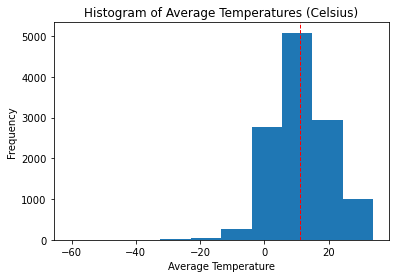

In [20]:
# plt.figure(figsize=(7, 5))
plt.hist(landtemps['avgtemp'])
plt.axvline(landtemps['avgtemp'].mean(),
            color='red',
            linestyle='dashed',
            linewidth=1)
plt.title('Histogram of Average Temperatures (Celsius)')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.show()

# Run a QQ plot to examine where the distribution deviates from a normal distribution

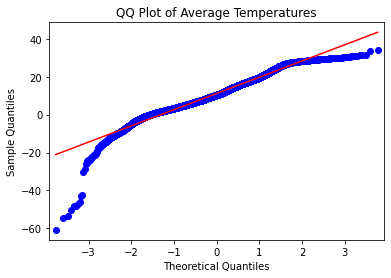

In [21]:
sm.qqplot(landtemps[['avgtemp']].sort_values(['avgtemp']), line='s')
plt.title('QQ Plot of Average Temperatures')
plt.show()

# Show the skewness and kurtosis for total Covid cases per million

In [22]:
covidtotals['total_cases_pm'].skew()

4.284484653881833

In [23]:
covidtotals['total_cases_pm'].kurtosis()

26.137524276840452

# Do a stacked histogram of the Covid case data

In [24]:
showregions = [
    'Oceania / Aus', 'East Asia', 'Southern Africa', 'Western Europe'
]

In [25]:
def getcases(regiondesc):
    return covidtotals.loc[covidtotals['region'] == regiondesc,
                           'total_cases_pm']

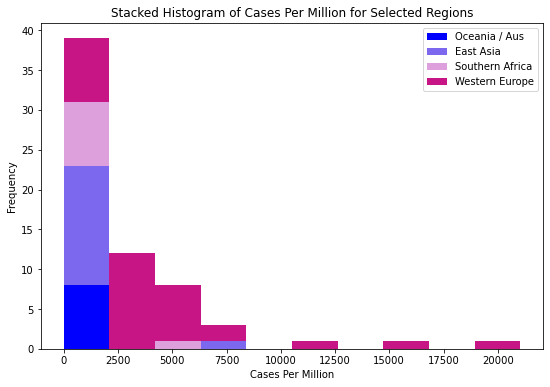

In [31]:
plt.figure(figsize=(9, 6))
plt.hist([getcases(k) for k in showregions],
         color=['blue', 'mediumslateblue', 'plum', 'mediumvioletred'],
         label=showregions,
         stacked=True)
plt.title('Stacked Histogram of Cases Per Million for Selected Regions')
plt.xlabel('Cases Per Million')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 22500, step=2500))
plt.legend()
plt.show()

# Show multiple histograms on one figure

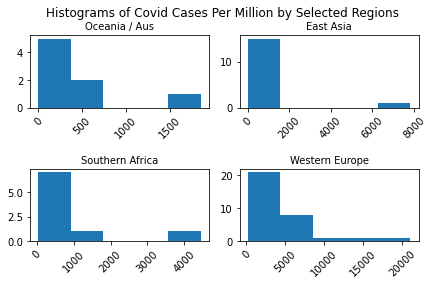

In [40]:
fig, axes = plt.subplots(2, 2)
fig.suptitle('Histograms of Covid Cases Per Million by Selected Regions')
axes = axes.ravel()

for j, ax in enumerate(axes):
    ax.hist(covidtotals.loc[covidtotals['region'] == showregions[j]]
            ['total_cases_pm'],
            bins=5)
    ax.set_title(showregions[j], fontsize=10)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

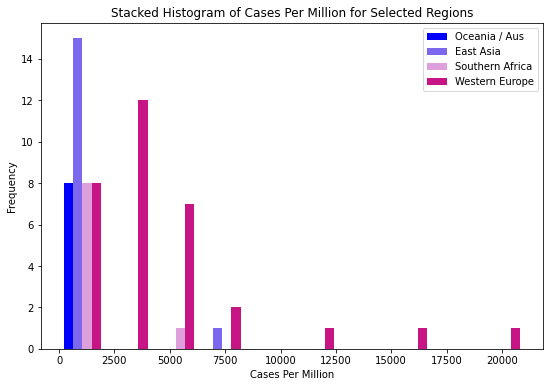

In [41]:
plt.figure(figsize=(9, 6))
plt.hist([getcases(k) for k in showregions],
         color=['blue', 'mediumslateblue', 'plum', 'mediumvioletred'],
         label=showregions,
         stacked=False)
plt.title('Stacked Histogram of Cases Per Million for Selected Regions')
plt.xlabel('Cases Per Million')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 22500, step=2500))
plt.legend()
plt.show()